In [1]:
import numpy as np
import odes

Name: Jacob Anabi, Gage Kizzar

Student ID: 2294644,2291700

Email: anabi@chapman.edu, kizzar@chapman.edu

Course: PHYS220/MATH220/CPSC220 Fall 2018

Assignment: CW11

# Abstract

In this paper we will be comparing a variety of methods to solve differential equations. The four methods that we will use are: Euler's Method, Heun's Method, and the 2nd and 4th order Runge-Kutta Methods. All of the methods have different strengths and weaknesses, and we hope to compare these in this paper.

# Introduction

Rememember from CW10 that there are many analytical methods to solve an ordinary differential equation (ODE). These methods include:

Euler's Method, Heun's (Trapezoid) Method, 2nd-order Runge-Kutta Method, and 4th-order Runge-Kutta Method.

# Coupled ODE Example

Let's consider the coupled set of ODEs with initial conditions $x(0) = 1$, $v(0) = 0$:

   $$x'(t) = v(t)$$
   $$v'(t) = -x(t)$$

If $x(t) = \cos(t)$, then $v(t) = x'(t) = -\sin(t)$

So, $v'(t) = -\cos(t) = -x(t)$

Thus, $x(t) = \cos(t)$ and $v(t) = -\sin(t)$ satisfies these equations. This solution can represent some sort of oscillation of a physical system.

# Methods

To solve the following equation with the aformentioned methods, we will state:
$$\vec{r}'(t) = \hat{J}\vec{r}$$
where $\vec{r}(t) = [x(t), v(t)]$ is a column vector with initial condition $\vec{r}(0) = [1,0]$, such that the coordinates are coupled by an antisymmetric matrix (meaning its transpose equals its negative):
$$\hat{J} = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}$$
This solution should be $\vec{r}(t) = \exp(t\hat{J})\vec{r}(0)$.

NOTE: $\exp(t\hat{J}) = \hat{I}\sum_{n=0}^\infty t^{2n}(-1)^n/(2n)! + \hat{J}\sum_{n=1}^\infty t^{2n-1}(-1)^{n-1}/(2n-1)! = \hat{I}\cos(t) + \hat{J}\sin(t)$

We will solve this differential equation from $t=0$ until $t= 5(2\pi)$ using $N$ time steps per period (so $\Delta t = 2\pi / N$).

## Euler's Method

For refamilirization, Euler's Method, which is accurate to 1st-order, is defined as:
$$u_{k+1} = u_k + \Delta t\, f[t_k, u_k]$$
where $f[t, u(t)]$ is the slope of $u(t)$ at some domain point $t$.

For clarity sake, we will rewrite this in terms of vectors:
$$\vec{r}(t_{k+1}) = \vec{r}(t_k) + \Delta t\, \vec{r}'(t_k)$$
Subsituting $\Delta t = 2\pi / N$, we get:
$$\vec{r}(t_{k+1}) = \vec{r}(t_k) + 2\pi / N\, \vec{r}'(t_k)$$
Substituting $$\vec{r}'(t) = \hat{J}\vec{r}$$ we get:
$$\vec{r}(t_{k+1}) = \vec{r}(t_k) + 2\pi / N\, \hat{J}\vec{r}(t_k)$$
To test Euler's method, we will plot the r(t) function user Euler's method, and the actual function definition defined above. We will be testing with 3 different $N$-values.

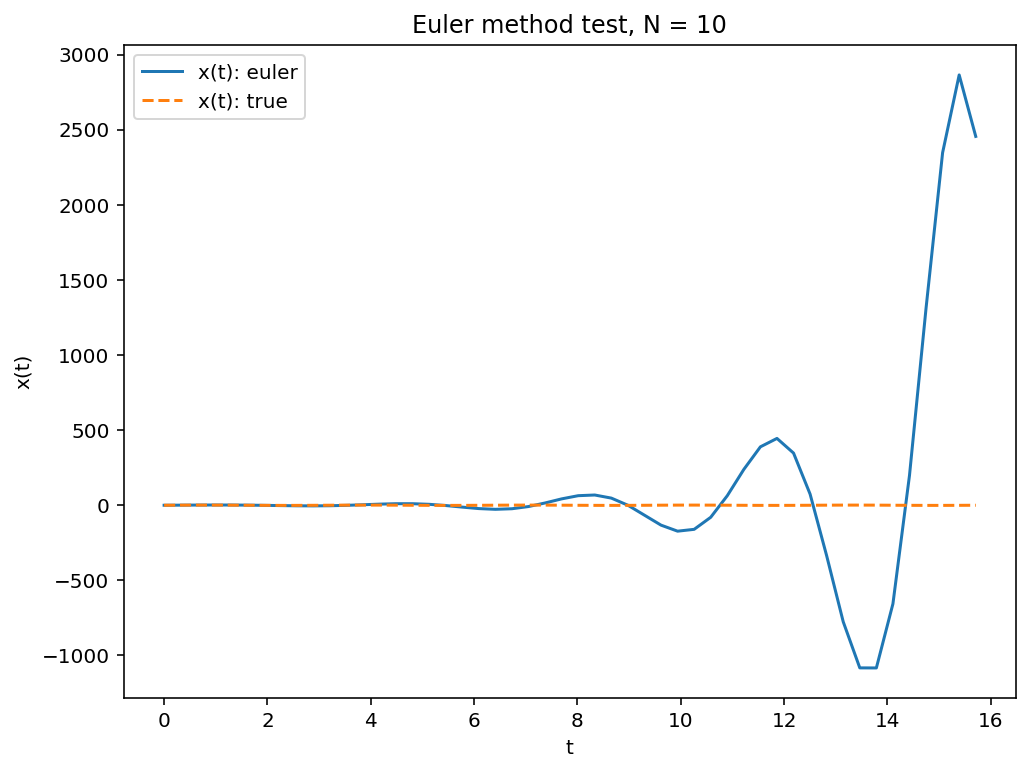

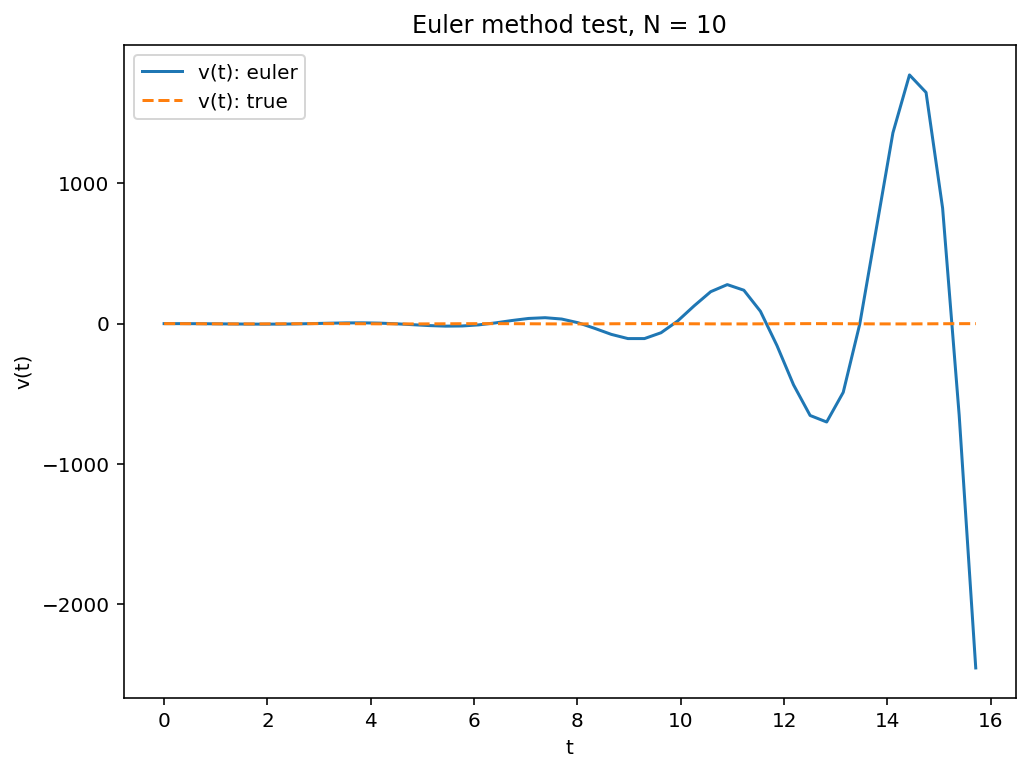

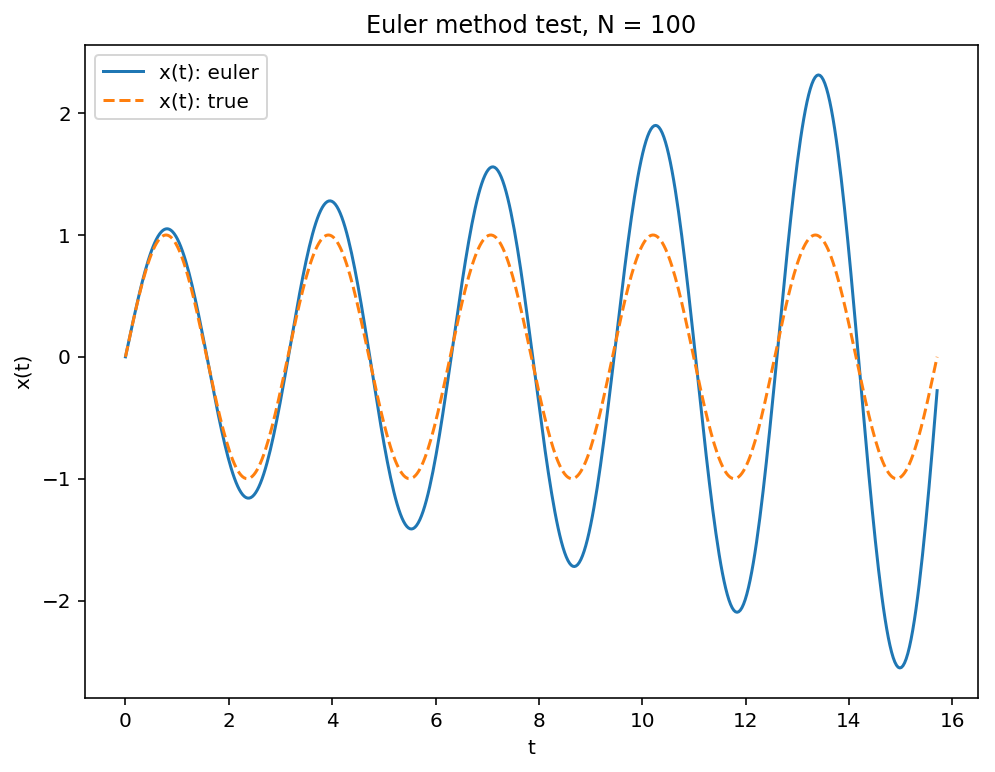

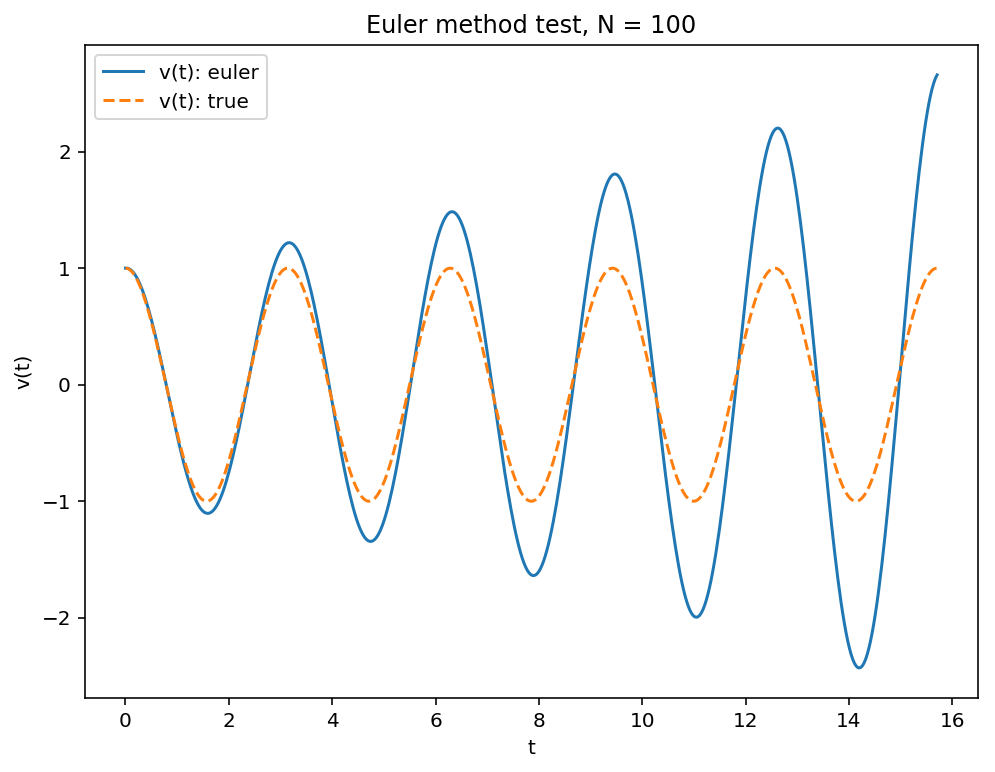

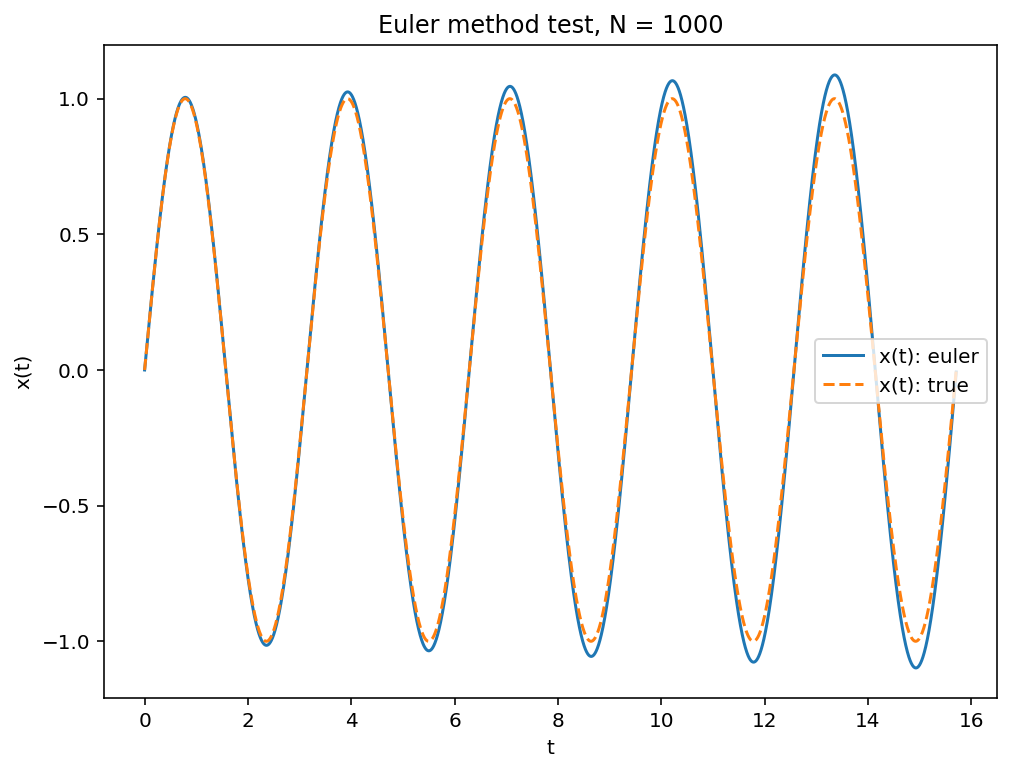

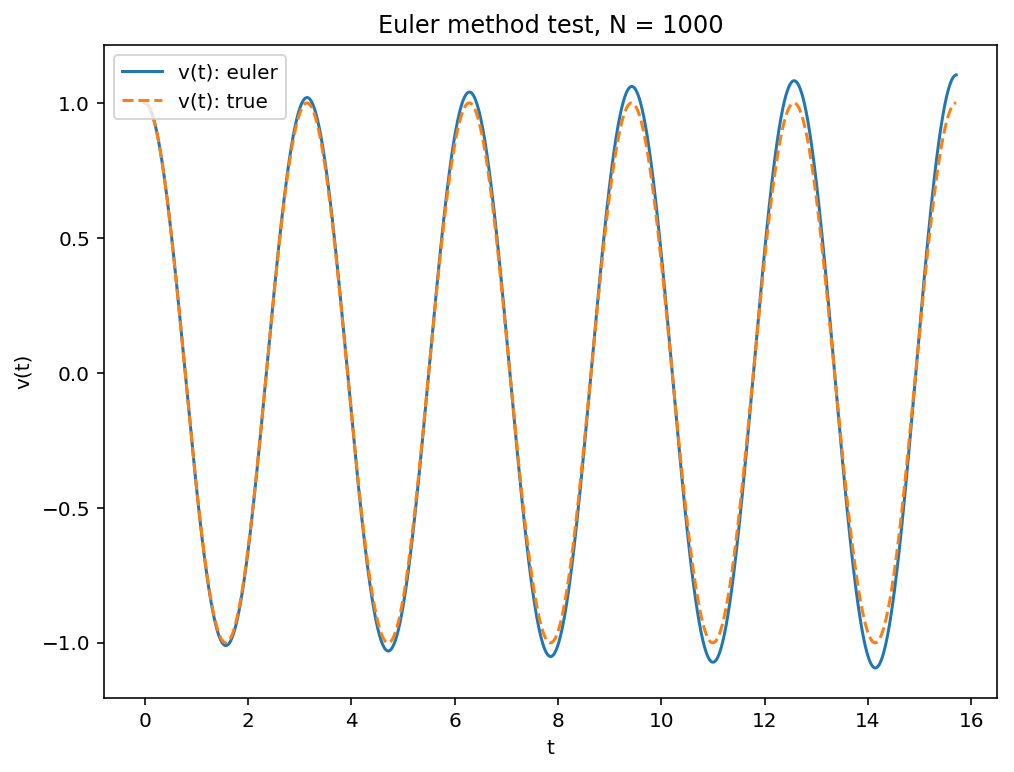

In [2]:
N = np.array([10, 100, 1000]) # three different N-values

for n in N:
    t = np.linspace(0, 5*np.pi, 5*n, endpoint=True) # domain t

    r_euler = odes.euler_method(np.array([0,1]), n) # r(t) using euler's method
    x_euler = np.array([i[0] for i in r_euler]) # retrieving each position from r(t)
    v_euler = np.array([i[1] for i in r_euler]) # retrieving each velocity from r(t)

    r_true = odes.gen_method(np.array([0,1]), n) # actual r(t)
    x_true = np.array([i[0] for i in r_true]) # retrieving actual x(t)
    v_true = np.array([i[1] for i in r_true]) # retrieving actual v(t)

    # title
    title = "Euler method test, N = "
    title += str(n)

    # legend labels
    xt_labels = np.array(["x(t): euler", "x(t): true"])
    vt_labels = np.array(["v(t): euler", "v(t): true"])

    odes.gen_plot(t, np.array([x_euler, x_true]), labels=xt_labels, linestyles=np.array(["-", "--"]), xlabel="t", ylabel="x(t)", title=title) # plotting x(t)'s
    odes.gen_plot(t, np.array([v_euler, v_true]), labels=vt_labels, linestyles=np.array(["-", "--"]), xlabel="t", ylabel="v(t)", title=title) # plotting v(t)'s

As we can see, Euler's method is not very accurate at smaller $N$-values, but as we increase the $N$-values, Euler's method begins the resemble the actual function $r(t)$, which is defined above. This inaccuracy is due to Euler's method only using a forward derivative and its assumption of a constant slope.

## Heun's (Trapezoidal) Method

The functions that we use to analyze a function using Heun's method is defined as:
$$slope_{left} = f[x_n,y_n]$$
$$(x_{n+1},y_{n+1}) = (x_n+h,y_n+hf(x_n,y_n))$$
$$slope_{right}= f(x_n+h,y_n+hf(x_n,y_n))$$
$$(x_{n+1},y_{n+1}) = 1/2(slope_{left}+slope_{right})$$
If we substitute relevant information from the example, we will get:
$$slope_{t} = f[t,u(t)]$$
$$\vec{r}(t_{k+\Delta t}) = (x_t+\Delta t, y_t + \Delta t f(t,u(t)))$$
$$slope_{t+\Delta t} = f[t+\Delta t,u(t) + \Delta t f[t,u(t)]]$$
$$\vec{r}(t_{k+\Delta t}) = 1/2(slope_{t}+slope_{t+\Delta t})$$

## 2nd Order Runge-Kutta Method

The form for using the 2nd Order Runge-Kutta in our example is the following:
$$k_1 = \Delta t f[t,u(t)]$$
$$k_2 = \Delta t f[x_t+(1/2)\Delta t,y_t+(1/2)k_1$$
$$y_{t+1}=y_t+k_2+O((\Delta t)^3)$$